<a href="https://colab.research.google.com/github/usshaa/A-complete-guide-to-DL/blob/master/Image_Classifier_with_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
# Load a small dataset (TFDS will download it automatically)
dataset_name = "cats_vs_dogs"
(train_ds, val_ds), ds_info = tfds.load(
    dataset_name,
    split=["train[:80%]", "train[80%:]"],
    with_info=True,
    as_supervised=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.L3D4PY_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [3]:
# Preprocessing function
IMG_SIZE = 224

In [4]:
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0  # Normalize
    return image, label

In [5]:
train_ds = train_ds.map(preprocess).shuffle(500).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

In [13]:
# Build the model using the Functional API
input_layer = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False # Freeze the base model
x = base_model(input_layer)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(2, activation='softmax')(x)  # 2 classes: cats & dogs

model = tf.keras.Model(inputs=input_layer, outputs=outputs)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=5)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.9831 - loss: 0.0456 - val_accuracy: 0.9850 - val_loss: 0.0417
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 38s 64ms/step - accuracy: 0.9864 - loss: 0.0391 - val_accuracy: 0.9852 - val_loss: 0.0428
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.9890 - loss: 0.0359 - val_accuracy: 0.9828 - val_loss: 0.0520
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 79s 65ms/step - accuracy: 0.9890 - loss: 0.0330 - val_accuracy: 0.9856 - val_loss: 0.0448
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 38s 64ms/step - accuracy: 0.9895 - loss: 0.0292 - val_accuracy: 0.9854 - val_loss: 0.0457


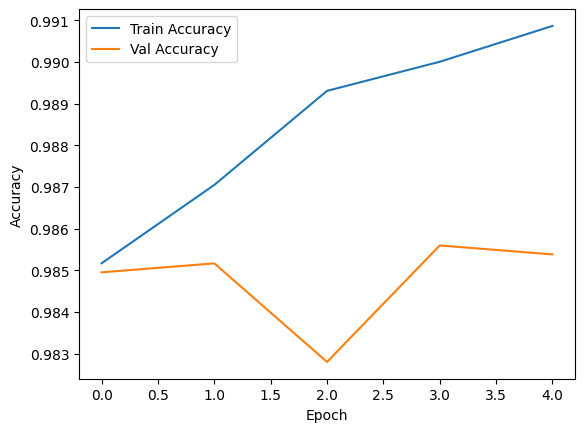

In [19]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted: 1 Actual: 1


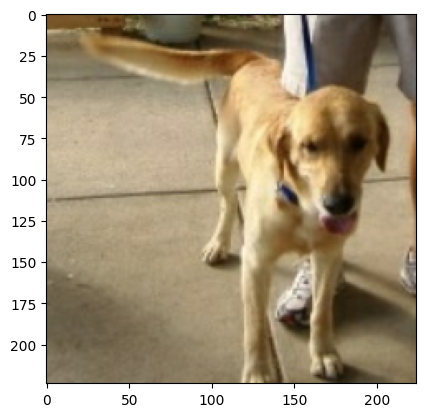

In [20]:
# Test with a single image from validation set
for image, label in val_ds.take(1):
    pred = model.predict(image)
    print("Predicted:", tf.argmax(pred[0]).numpy(), "Actual:", label[0].numpy())
    plt.imshow(image[0])
    plt.show()